At this point, you have obtained the data set for your Capstone project, cleaned and wrangled it into a form that's ready for analysis. 

It's now time to apply the inferential statistics techniques you have learned to explore the data. 

For example, are there variables that are particularly significant in terms of explaining the answer to your project question? Are there strong correlations between pairs of independent variables, or between an independent and a dependent variable? 

Submission: Write a short report (1-2 pages) on the inferential statistics steps you performed and your findings. Check this report into your github and submit a link to it. Eventually, this report can be incorporated into your Milestone report.


In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import datetime
import pickle
import seaborn as sns

In [2]:
df = pd.read_pickle('weather_ozone')
monthly_corr = pd.read_pickle('monthly_corr')

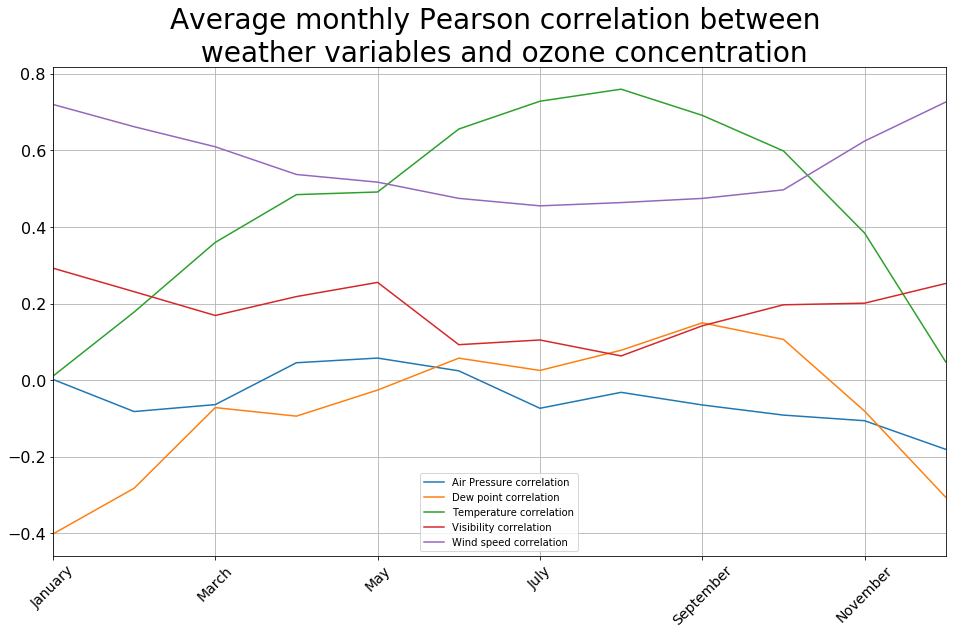

In [16]:
_ = plt.rcParams['figure.figsize'] = [16, 9]
monthly_corr.plot()
plt.title("Average monthly Pearson correlation between \n weather variables and ozone concentration", size=28)
plt.xticks(rotation=45, size=14)
plt.yticks(size=16)
plt.grid()
plt.show()

In [4]:
years = sorted(df.index.year.unique())
months = sorted(df.index.month.unique())
month_names = ['January', 'February', 'March', 'April', 'May', 
               'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [5]:
pearson_temp = []
for mo in months:
        pearson_temp.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'TEMP'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_temp = np.array(pearson_temp)

pearson_dewp = []
for mo in months:
        pearson_dewp.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'DEWP'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_dewp = np.array(pearson_dewp)

pearson_spd = []
for mo in months:
        pearson_spd.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'SPD'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_spd = np.array(pearson_spd)

pearson_vsb = []
for mo in months:
        pearson_vsb.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'VSB'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_vsb = np.array(pearson_vsb)

pearson_stp = []
for mo in months:
        pearson_stp.append(list(stats.pearsonr(df.loc[df.index.month==mo, 'STP'], 
                                                df.loc[df.index.month==mo, 'ozone_ppm'])))
pearson_stp = np.array(pearson_stp)



In [6]:
pearson_tests = pd.DataFrame(data = {'Temperature':pearson_temp[:,1], 
                                     'Dew \n Point':pearson_dewp[:,1],
                                     'Wind \n Speed':pearson_spd[:,1],
                                    'Visibility':pearson_vsb[:,1],
                                    'Air \n Pressure':pearson_stp[:,1]}, index = month_names)

In [7]:
pearson_tests

,Air Pressure,Dew Point,Temperature,Visibility,Wind Speed
January,8.859503e-01,9.991711e-228,4.245755e-01,1.159616e-116,0.000000e+00
February,2.066427e-09,4.887657e-98,5.614389e-39,2.480399e-65,0.000000e+00
March,1.595112e-06,7.232991e-08,1.820438e-171,3.040488e-37,0.000000e+00
April,6.234839e-04,1.284579e-12,0.000000e+00,4.083006e-62,0.000000e+00
May,1.263911e-05,4.932058e-02,0.000000e+00,4.410572e-86,0.000000e+00
June,7.025584e-02,1.877779e-05,0.000000e+00,4.899053e-12,6.092642e-310
July,1.789350e-08,5.272128e-02,0.000000e+00,8.591298e-16,2.003610e-297
August,1.518095e-02,2.729041e-09,0.000000e+00,1.478878e-06,7.901803e-307
September,1.181493e-06,2.031668e-29,0.000000e+00,1.402317e-26,9.984827e-313
October,3.893318e-12,6.032707e-16,0.000000e+00,2.532566e-51,0.000000e+00


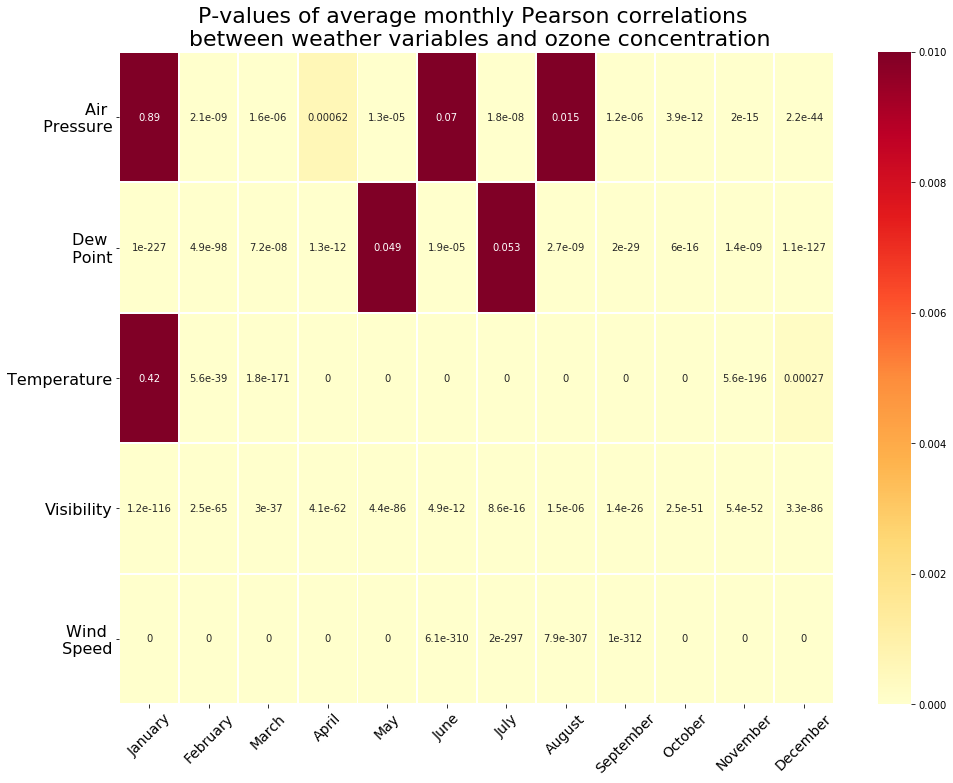

In [15]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(pearson_tests.transpose(), annot=True, linewidths=1, cmap="YlOrRd", vmax=0.01)
plt.title("P-values of average monthly Pearson correlations \n between weather variables and ozone concentration", 
          size=22)
plt.xticks(rotation=45, size=14)
plt.yticks(rotation=0, size=16)
plt.show()